In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)	

In [6]:
# check for null values
df.isnull().sum()         

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

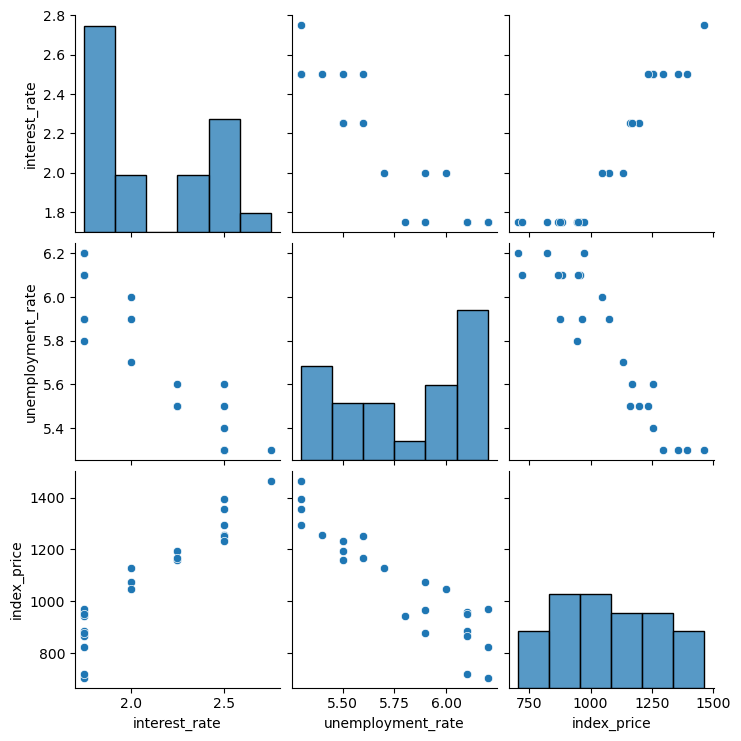

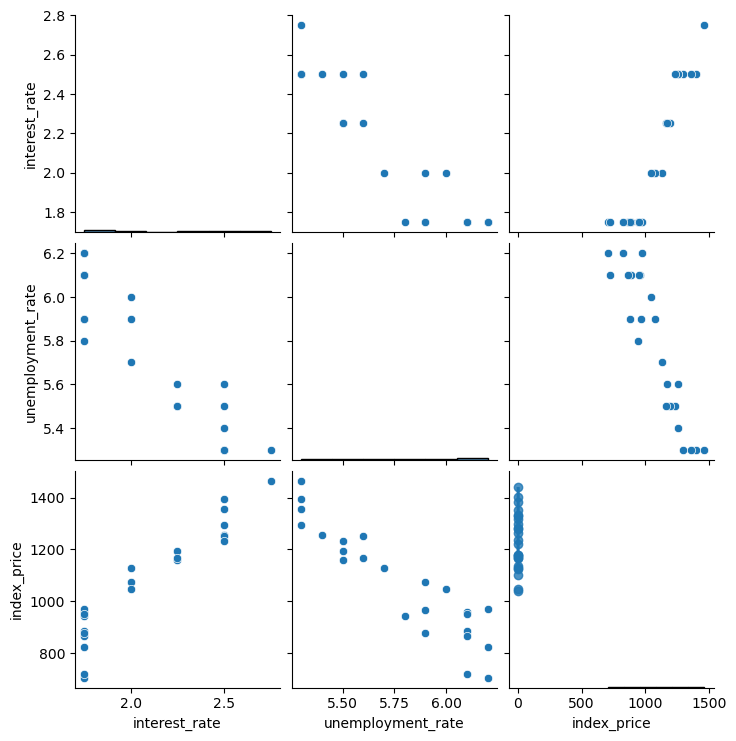

In [8]:
# check for Linearity between features & target

sns.pairplot(df)

df.corr()

sns.regplot(x=df['interest_rate'],y=df['index_price'])
plt.show()

In [9]:
# features & target sepration

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# model fitting

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
# cross validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [16]:
np.mean(cvs)

np.float64(-5914.828180162386)

In [18]:
# prediction

y_pred = model.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [22]:
# performance matrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)

print(mse)
print(mae)
print(rmse)
print(score)

5793.762887712569
59.935781523235484
76.11677139574805
0.8278978091457145


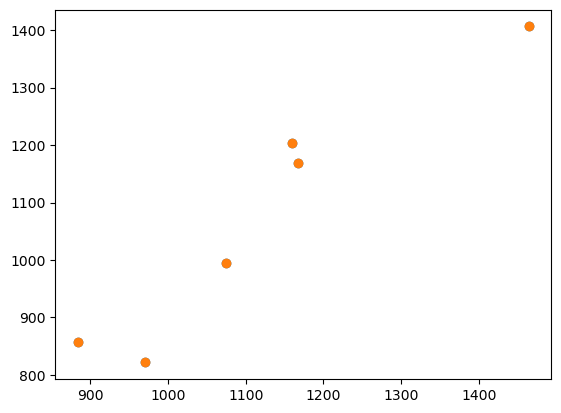

In [25]:
# Assumptions

plt.scatter(y_test,y_pred)
plt.show()

In [26]:
# calculate residuals/Error

residuals = y_test - y_pred

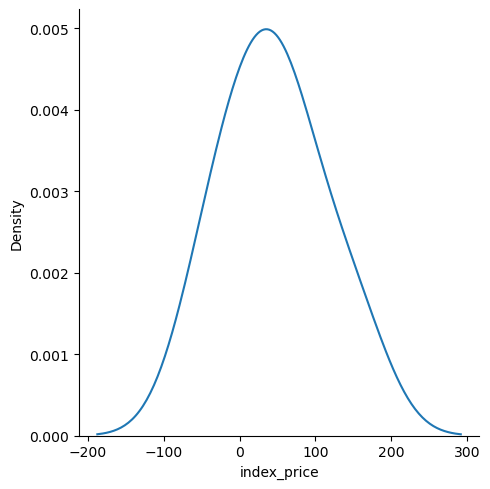

In [30]:
sns.displot(residuals,kind='kde')
plt.show()

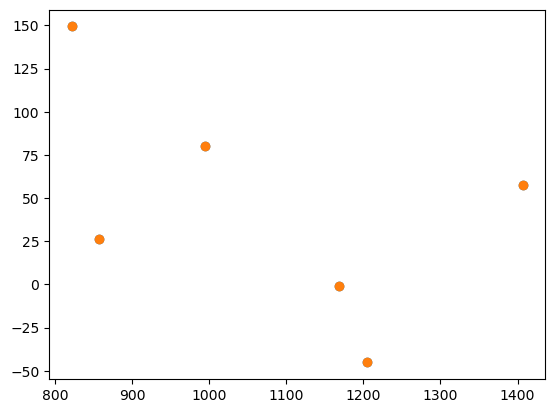

In [32]:
plt.scatter(y_pred,residuals)
plt.show()

In [37]:
# OLS

import statsmodels.api as sm

model_ = sm.OLS(y_train,X_train).fit()

In [38]:
model_.summary()

/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 02 Aug 2025   Prob (F-statistic):                       0.754
Time:                        02:21:41   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""